In [6]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

In [8]:
#3-1
# the function
def corrAndCosine(x,y):
    # compute cosine similarity
    num = np.dot(x,y) # numerator
    den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm  = x-np.mean(x)
    ym  = y-np.mean(y)
    num = np.dot(xm,ym) # numerator
    den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
    cor = num / den

    return cor,cos


# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation and cosine
r,c = corrAndCosine(a,b)

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])


[ 0.41766923  0.51291295  0.50794553  2.42203372  0.08827404  0.62281817
 -1.67736617 -0.80653509  0.40389073 -0.68474331 -2.6221937   0.46042217
 -1.1746634   1.33696457 -0.36784966]
0.16526015020919851 0.16526015020919851


[[ 1.         -0.78779808]
 [ 1.         -0.78749923]
 [ 1.         -0.78718734]
 [ 1.         -0.78686153]
 [ 1.         -0.78652085]
 [ 1.         -0.78616426]
 [ 1.         -0.78579062]
 [ 1.         -0.78539868]
 [ 1.         -0.78498706]
 [ 1.         -0.78455425]
 [ 1.         -0.78409855]
 [ 1.         -0.78361811]
 [ 1.         -0.78311087]
 [ 1.         -0.7825745 ]
 [ 1.         -0.78200645]
 [ 1.         -0.7814038 ]
 [ 1.         -0.78076332]
 [ 1.         -0.78008131]
 [ 1.         -0.77935362]
 [ 1.         -0.77857551]
 [ 1.         -0.77774154]
 [ 1.         -0.77684549]
 [ 1.         -0.77588018]
 [ 1.         -0.77483725]
 [ 1.         -0.77370698]
 [ 1.         -0.77247793]
 [ 1.         -0.7711366 ]
 [ 1.         -0.76966689]
 [ 1.         -0.76804949]
 [ 1.         -0.76626103]
 [ 1.         -0.76427294]
 [ 1.         -0.76204993]
 [ 1.         -0.75954791]
 [ 1.         -0.75671108]
 [ 1.         -0.75346772]
 [ 1.         -0.74972423]
 [ 1.         -0.74535599]
 

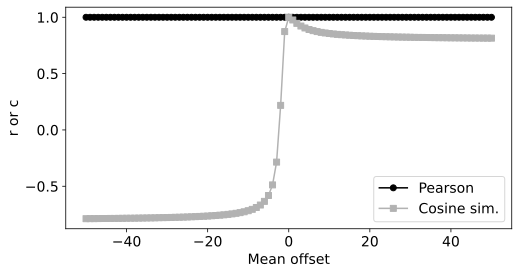

In [13]:
#3-2

# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets),2))

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])

print(results)
# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

In [15]:
#3-3
# import the function
from scipy.stats import pearsonr

# inspect the source code
pearsonr


Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelat

In [20]:
#3-4
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')


My function took 25.19 ms
   pearsonr took 331.39 ms


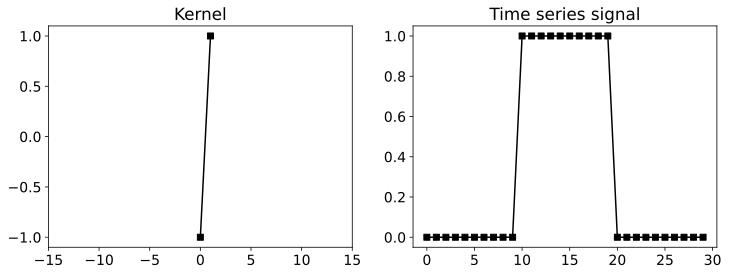

In [21]:
#3-5
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png',dpi=300)
plt.show()



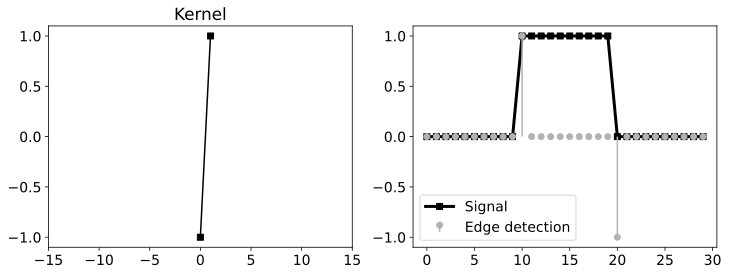

In [27]:
#3-5
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products!)
for t in range(1,len(signal)-1):
    featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                basefmt=' ',linefmt='',markerfmt='o',
                                label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.savefig('Figure_03_04c.png',dpi=300)
plt.show()

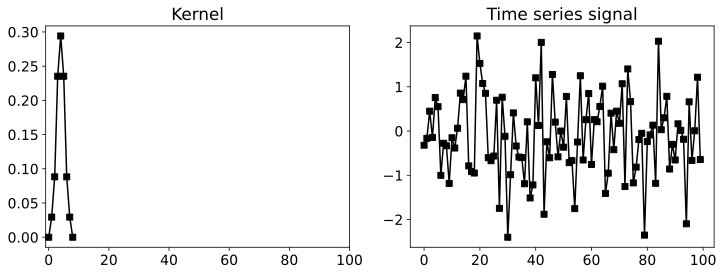

In [29]:
#3-6
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

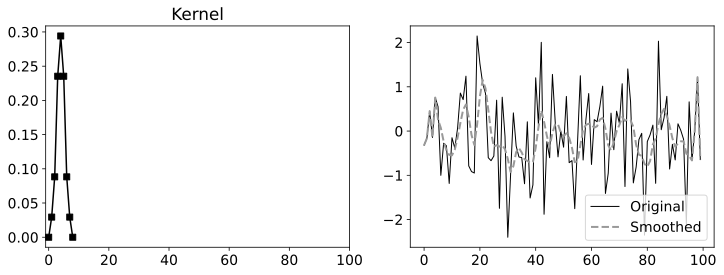

In [30]:
#3-6
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()


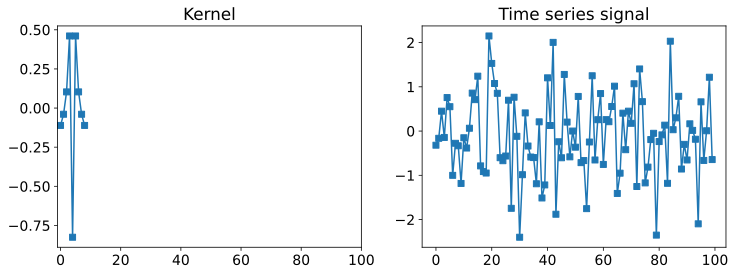

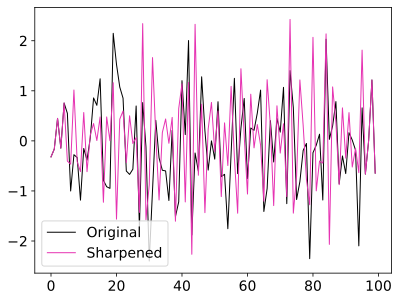

In [32]:
#3-7
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
    filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

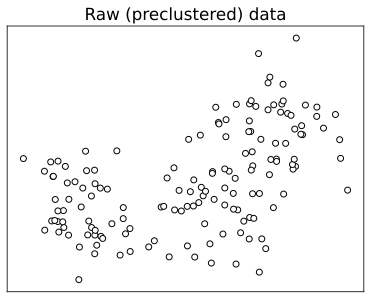

In [64]:
#3-8 K-mean clustering
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

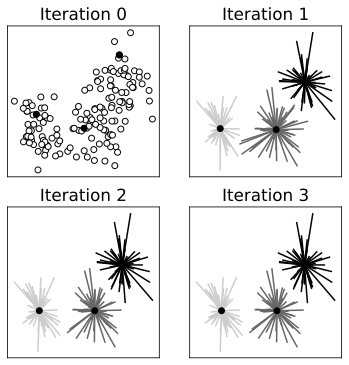

In [65]:
#3-8
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()

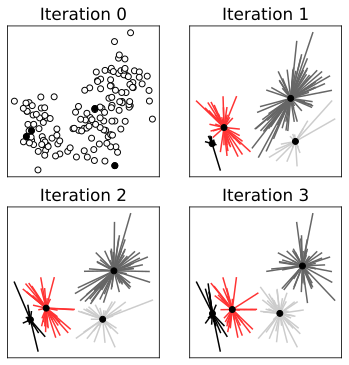

In [83]:
#3-9
#3-8
## initialize random cluster centroids
k = 4 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8], [1,.2,.2] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()
